In [1]:
import pandas as pd
from pathlib import Path

# Chargement du dataset

In [2]:
csv_path = Path("..") / "data" / "articles.csv"
df = pd.read_csv(csv_path)

# Affichage général

In [3]:
# Affichage général
print(f"Nombre total d'articles: {len(df)}")
print(f"Colonnes disponibles: {df.columns.tolist()}")
print("\nNombre d'articles par catégorie:")
print(df['section'].value_counts())

Nombre total d'articles: 60000
Colonnes disponibles: ['section', 'title', 'text']

Nombre d'articles par catégorie:
section
Business      10000
Politics      10000
Culture       10000
Sport         10000
Technology    10000
World news    10000
Name: count, dtype: int64


In [4]:
print("\n--- Aperçus par catégorie ---")
# Boucle sur chaque catégorie unique
for section in df['section'].unique():
    print(f"\n### Catégorie : {section} ###")
    display(df[df['section'] == section].head(3))  # 3 premiers articles pour chaque catégorie


--- Aperçus par catégorie ---

### Catégorie : Business ###


section                                              title  \
0  Business  Fuel tanker rates surge as Middle East crisis ...   
1  Business  UK bank TSB could be sold off by Spanish owner...   
2  Business  World’s largest banks pledged $869bn to fossil...   

                                                text  
0  two tankers have collided in waters off the un...  
1  the spanish bank sabadell has said it has rece...  
2  the worlds largest banks boosted the amount of...


### Catégorie : Politics ###


section                                              title  \
10000  Politics  Louise Casey criticises Tories for politicisin...   
10001  Politics  Britons in Israel told to notify Foreign Offic...   
10002  Politics  Keir Starmer’s biggest U-turns since Labour ca...   

                                                    text  
10000  keir starmer and donald trump signed off a uku...  
10001  british people in israel are being told to reg...  
10002  keir starmers midair announcement that he was ...


### Catégorie : Culture ###


section                                              title  \
20000  Culture  ‘Nobody makes a record like that for the money...   
20001  Culture  Eric Cantona and Ella Toone help meld football...   
20002  Culture  At a festival, are you Elinor or Marianne? | B...   

                                                    text  
20000  jon king singer songwriter i grew up in a real...  
20001  everybody needs his own ritual or way of prepa...  
20002  your articles presented two entertaining but v...


### Catégorie : Sport ###


section                                              title  \
30000   Sport  Thunder move one win from first NBA title in 4...   
30001   Sport  Johnny Sexton insists he is ‘here to help’ Fin...   
30002   Sport  Dan Evans reproduces form of old to beat Franc...   

                                                    text  
30000  the oklahoma city thunder moved within one win...  
30001  johnny sexton has insisted he is here to help ...  
30002  dan evans opened up the mens tournament at que...


### Catégorie : Technology ###


section                                              title  \
40000  Technology  Makers of air fryers and smart speakers told t...   
40001  Technology    Liverpool is crypto capital of UK, survey finds   
40002  Technology  UK government rollout of Humphrey AI tool rais...   

                                                    text  
40000  makers of air fryers smart speakers fertility ...  
40001  the citys most famous sons may have sung that ...  
40002  the governments artificial intelligence ai too...


### Catégorie : World news ###


section                                              title  \
50000  World news  Iran and Israel trade more attacks as Trump de...   
50001  World news  ‘They were my everything’: tributes paid as na...   
50002  World news  At least 15 die in Russian strikes on Kyiv in ...   

                                                    text  
50000  china has said some of its citizens have been ...  
50001  tributes are being made to the passengers who ...  
50002  on the g7 summit in canada my colleagues patri...

In [5]:
df['text'][0]

'two tankers have collided in waters off the united arab emirates and caught fire in the early hours this morning the united arab emirates coast guard says it evacuated 24 people from oil tanker adalynn following a collision between two ships in the gulf of oman near the strait of hormuz british maritime security firm ambrey has said the cause of the incident was not securityrelated daniel smith an analyst at ambrey said via bloomberg at the time of writing we can only confirm that it is not a security incident we continue to investigate the cause global oil supply is set to increase far faster than demand in the coming years the international energy agency has predicted in a new report the iea argues that oil markets are undergoing structural changes as the key drivers of supply and demand growth of the past 15 years start to fade the iea estimates that global oil demand is forecast to increase by 25 million barrels per day mbd between 2024 and 2030 reaching a plateau of around 1055 m

In [6]:
import sys
sys.path.append('../nlp') 

from preprocessing import Preprocessing

preprocessor = Preprocessing()

# S'assurer que la colonne texte n'a pas de valeurs manquantes
df = df[df['text'].notnull()].copy()

# Initialiser la colonne 'clean_text' vide
df['clean_text'] = None

# Appliquer le traitement sur les premiers articles de chaque section
for section in df['section'].unique():
    # Récupère les indices des premiers articles de la section
    section_indices = df[df['section'] == section].head(1).index
    df.loc[section_indices, 'clean_text'] = df.loc[section_indices, 'text'].apply(preprocessor.preprocess)


In [7]:
# Check how many were processed
print(df['clean_text'].notnull().sum())

6


In [8]:
from IPython.display import display

# Filtrer uniquement les lignes où le prétraitement a été appliqué
df_subset = df[df['clean_text'].notnull()][['section', 'text', 'clean_text']]
pd.set_option('display.max_colwidth', 200)

display(df_subset)

section  \
0        Business   
10000    Politics   
20000     Culture   
30000       Sport   
40000  Technology   
50000  World news   

                                                                                                                                                                                                          text  \
0      two tankers have collided in waters off the united arab emirates and caught fire in the early hours this morning the united arab emirates coast guard says it evacuated 24 people from oil tanker ad...   
10000  keir starmer and donald trump signed off a ukus trade deal at the g7 summit in canada with the us president saying britain would have protection against future tariffs because i like them peter wa...   
20000  jon king singer songwriter i grew up in a really boring village in kent so moving to leeds as a student was thrilling it was an alist place to see gigs on the other hand the buildings were as blac...   
30000  the oklahoma city thunder moved within one win of their first nba championship in 46 years on monday night beating the indiana pacers 120109 in game 5 of the nba finals to take a 32 series lead ja...   
40000  makers of air fryers smart speakers fertility trackers and smart tvs have been told to respect peoples rights to privacy by the uk information commissioners office ico people have reported feeling...   
50000  china has said some of its citizens have been able to leave iran agence francepresse afp reports foreign ministry spokesman guo jiakun told reporters in bejing at present some chinese citizens hav...   

                                                                                                                                                                                                    clean_text  
0      two tanker collided water united arab emirate caught fire early hour morning united arab emirate coast guard say evacuated people oil tanker adalynn following collision two ship gulf oman near str...  
10000  keir starmer donald trump signed ukus trade deal g summit canada president saying britain would protection future tariff like peter walker report deal uk aerospace sector avoids tariff car industr...  
20000  jon king singer songwriter grew really boring village kent moving leeds student thrilling alist place see gig hand building black soot yorkshire ripper around could feel tension national front sou...  
30000  oklahoma city thunder moved within one win first nba championship year monday night beating indiana pacer game nba final take series lead jalen williams erupted career playoffhigh point mvp shai g...  
40000  maker air fryer smart speaker fertility tracker smart tv told respect people right privacy uk information commissioner office ico people reported feeling powerless control data gathered used share...  
50000  china said citizen able leave iran agence francepresse afp report foreign ministry spokesman guo jiakun told reporter bejing present chinese citizen safely evacuated neighbouring country israel ir...

In [9]:
df_subset['original_len'] = df_subset['text'].apply(lambda x: len(str(x).split()))
df_subset['cleaned_len'] = df_subset['clean_text'].apply(lambda x: len(str(x).split()))

df_subset[['section', 'original_len', 'cleaned_len']]

section  original_len  cleaned_len
0        Business          2175         1259
10000    Politics           917          471
20000     Culture           797          421
30000       Sport           666          377
40000  Technology           378          205
50000  World news          5432         3210

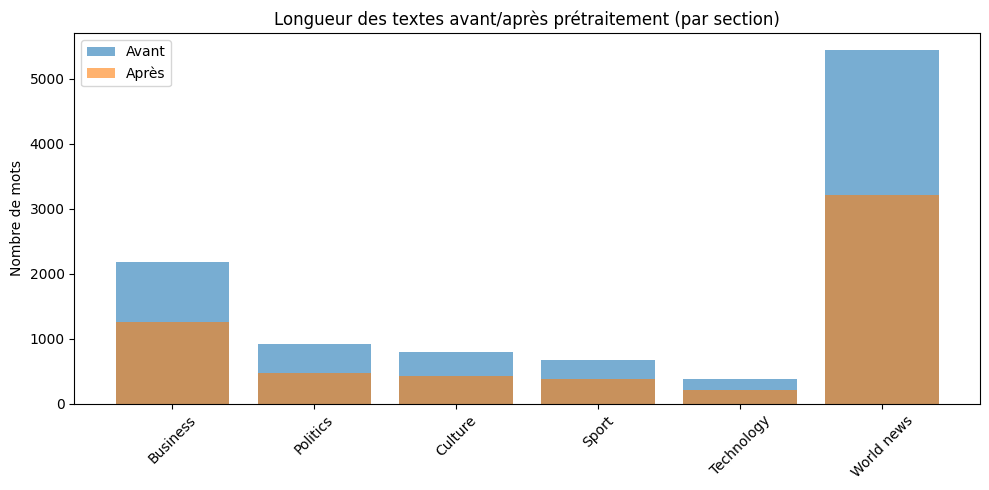

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_subset['section'], df_subset['original_len'], alpha=0.6, label='Avant')
plt.bar(df_subset['section'], df_subset['cleaned_len'], alpha=0.6, label='Après')
plt.ylabel("Nombre de mots")
plt.title("Longueur des textes avant/après prétraitement (par section)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

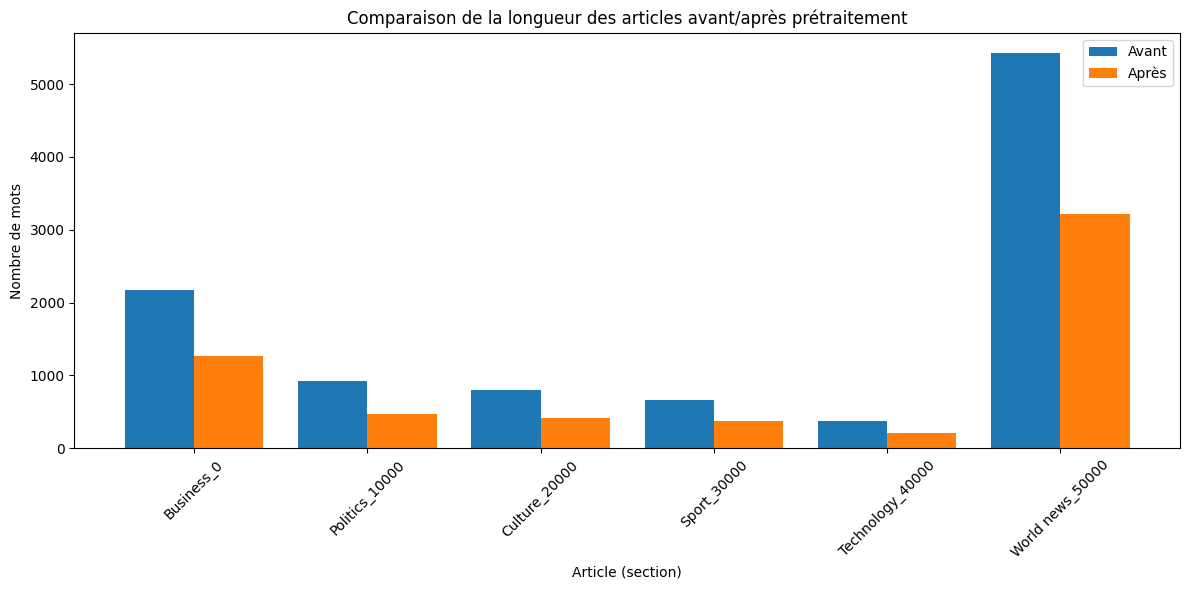

In [11]:
import numpy as np

x = np.arange(len(df_subset))  # positions
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, df_subset['original_len'], width=width, label='Avant')
plt.bar(x + width/2, df_subset['cleaned_len'], width=width, label='Après')

plt.title("Comparaison de la longueur des articles avant/après prétraitement")
plt.xlabel("Article (section)")
plt.ylabel("Nombre de mots")
plt.xticks(x, df_subset['section'] + "_" + df_subset.index.astype(str), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df_subset['reduction_ratio'] = 1 - (df_subset['cleaned_len'] / df_subset['original_len'])
df_subset[['section', 'original_len', 'cleaned_len', 'reduction_ratio']]

section  original_len  cleaned_len  reduction_ratio
0        Business          2175         1259         0.421149
10000    Politics           917          471         0.486369
20000     Culture           797          421         0.471769
30000       Sport           666          377         0.433934
40000  Technology           378          205         0.457672
50000  World news          5432         3210         0.409057

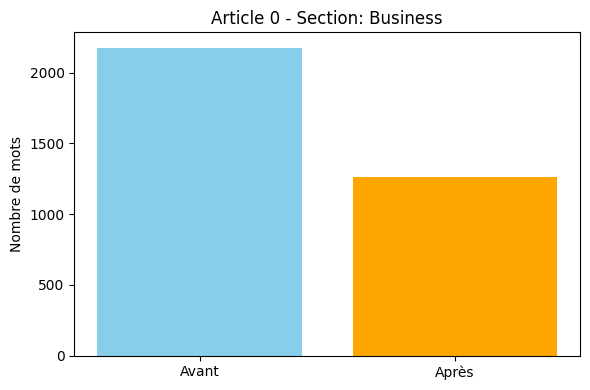


=== Article index 0 - Section: Business ===
Top 10 mots AVANT prétraitement:
[('the', 139), ('to', 62), ('of', 52), ('in', 45), ('and', 38), ('a', 38), ('that', 36), ('for', 25), ('is', 23), ('oil', 21)]
Nombre d'occurrences du mot 'us' dans le texte original : 12
Top 10 mots APRÈS prétraitement:
[('oil', 21), ('iran', 16), ('said', 13), ('market', 12), ('price', 12), ('point', 12), ('uk', 11), ('israel', 10), ('east', 9), ('could', 8)]


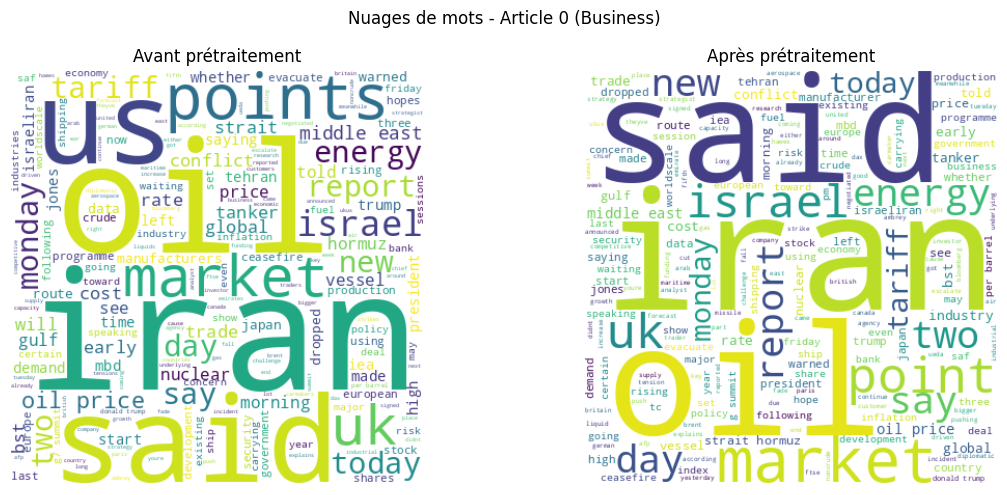

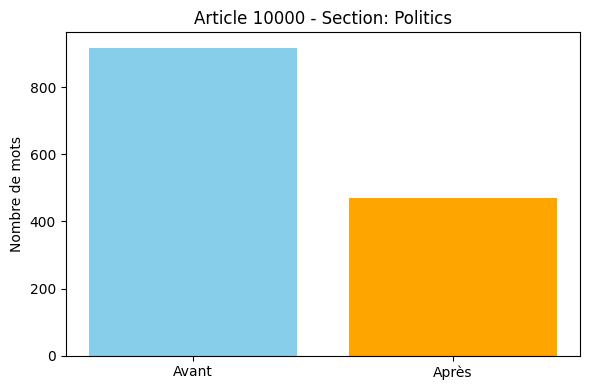


=== Article index 10000 - Section: Politics ===
Top 10 mots AVANT prétraitement:
[('the', 46), ('to', 26), ('and', 20), ('a', 18), ('i', 17), ('it', 17), ('in', 14), ('on', 13), ('at', 12), ('that', 12)]
Nombre d'occurrences du mot 'us' dans le texte original : 3
Top 10 mots APRÈS prétraitement:
[('tariff', 5), ('report', 5), ('still', 5), ('message', 5), ('yesterday', 4), ('casey', 4), ('felt', 4), ('time', 4), ('pm', 4), ('starmer', 3)]


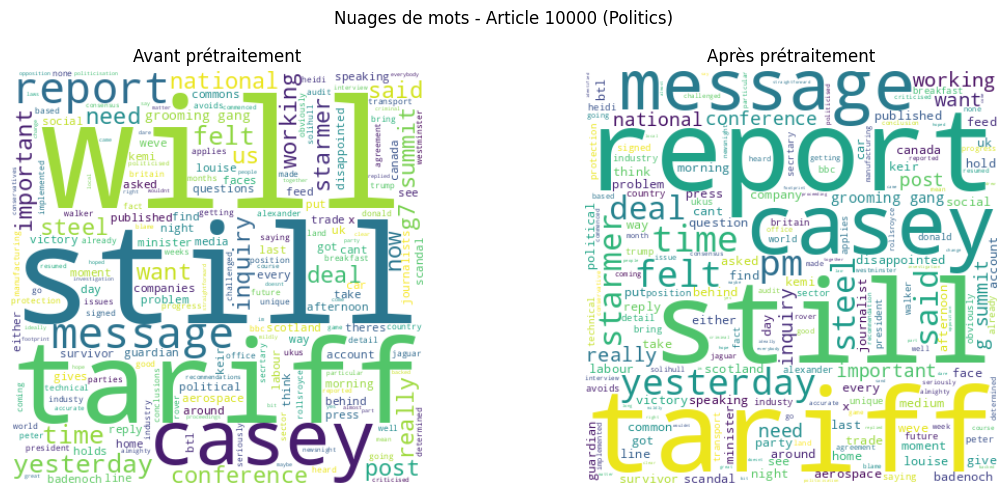

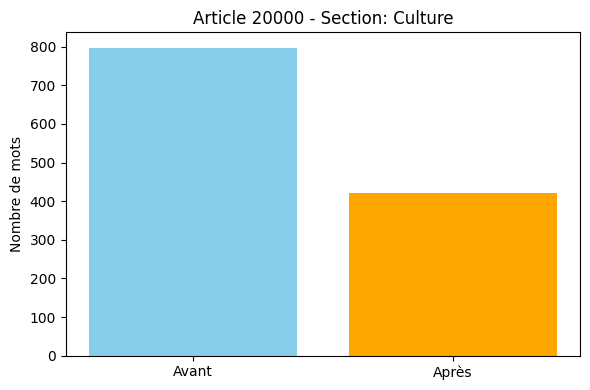


=== Article index 20000 - Section: Culture ===
Top 10 mots AVANT prétraitement:
[('the', 46), ('and', 24), ('a', 22), ('to', 20), ('we', 17), ('i', 14), ('of', 14), ('on', 13), ('in', 12), ('was', 12)]
Nombre d'occurrences du mot 'us' dans le texte original : 9
Top 10 mots APRÈS prétraitement:
[('like', 7), ('song', 6), ('entertainment', 5), ('recorded', 4), ('jon', 3), ('leeds', 3), ('came', 3), ('andy', 3), ('four', 3), ('band', 3)]


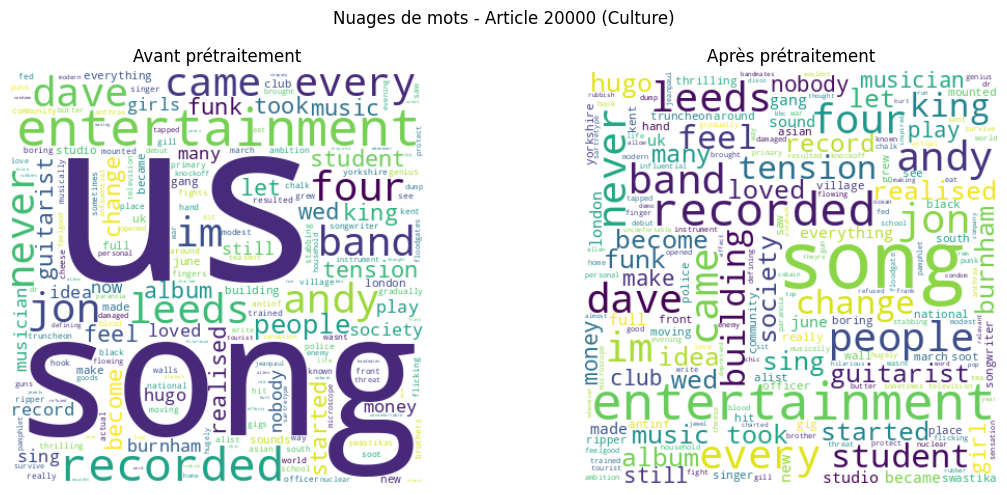

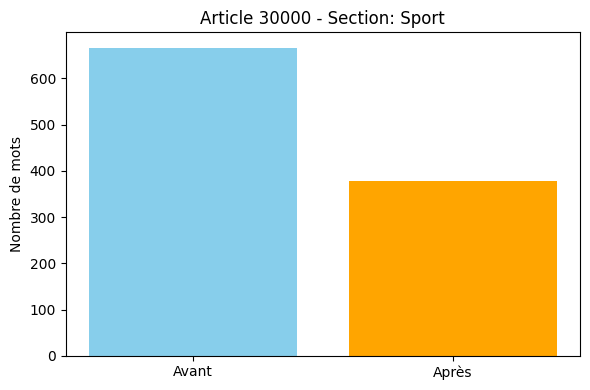


=== Article index 30000 - Section: Sport ===
Top 10 mots AVANT prétraitement:
[('the', 43), ('in', 21), ('a', 21), ('and', 16), ('to', 14), ('of', 12), ('pacers', 9), ('game', 9), ('indiana', 8), ('points', 8)]
Nombre d'occurrences du mot 'us' dans le texte original : 0
Top 10 mots APRÈS prétraitement:
[('indiana', 10), ('game', 10), ('point', 10), ('pacer', 9), ('oklahoma', 7), ('city', 7), ('thunder', 7), ('first', 7), ('williams', 6), ('time', 6)]


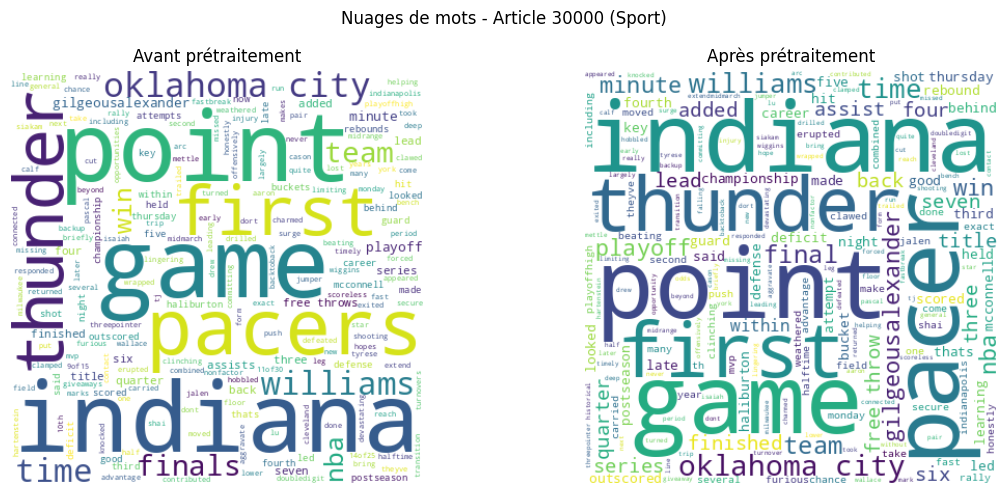

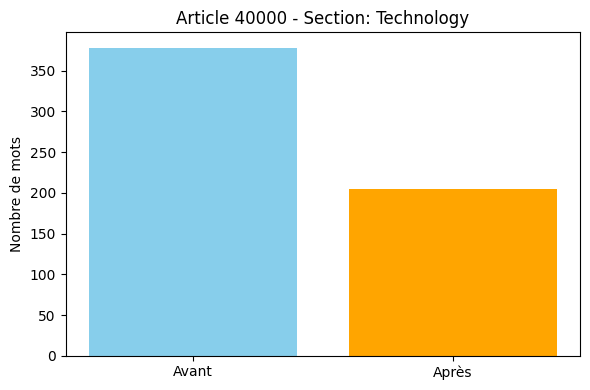


=== Article index 40000 - Section: Technology ===
Top 10 mots AVANT prétraitement:
[('to', 18), ('the', 14), ('and', 13), ('of', 12), ('information', 10), ('their', 9), ('we', 8), ('smart', 7), ('that', 7), ('data', 6)]
Nombre d'occurrences du mot 'us' dans le texte original : 1
Top 10 mots APRÈS prétraitement:
[('information', 10), ('smart', 7), ('people', 6), ('data', 6), ('personal', 5), ('product', 5), ('privacy', 4), ('collect', 4), ('manufacturer', 4), ('ico', 3)]


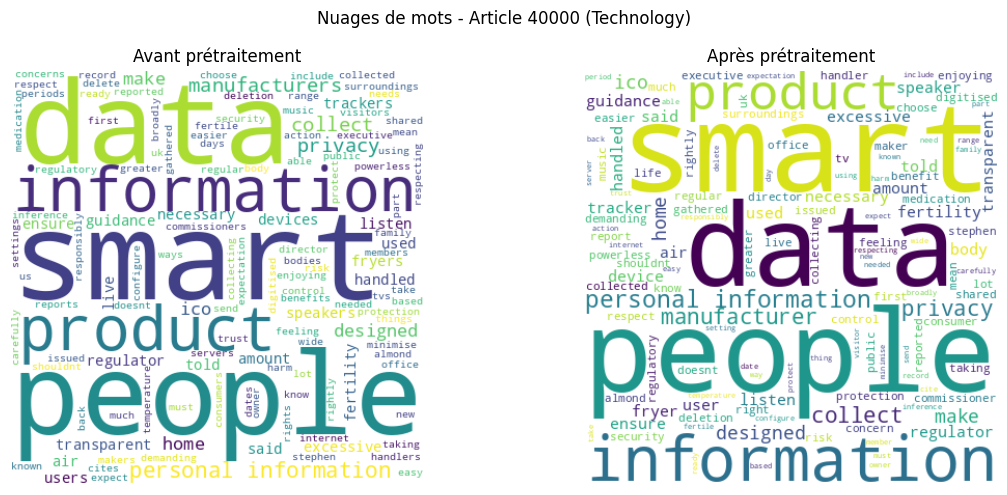

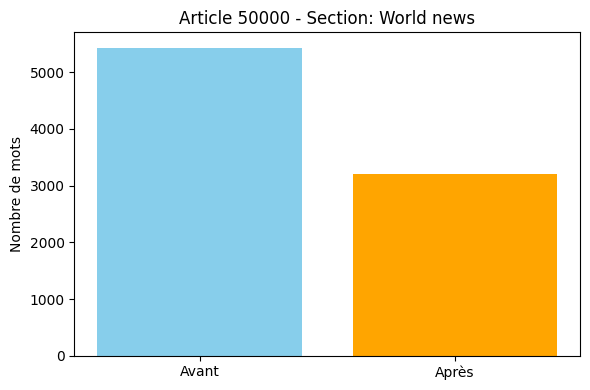


=== Article index 50000 - Section: World news ===
Top 10 mots AVANT prétraitement:
[('the', 287), ('in', 145), ('to', 142), ('of', 141), ('a', 131), ('and', 113), ('on', 87), ('that', 66), ('israel', 63), ('iran', 61)]
Nombre d'occurrences du mot 'us' dans le texte original : 35
Top 10 mots APRÈS prétraitement:
[('iran', 71), ('israel', 66), ('said', 59), ('trump', 43), ('israeli', 40), ('report', 30), ('tehran', 27), ('iranian', 25), ('military', 24), ('people', 21)]


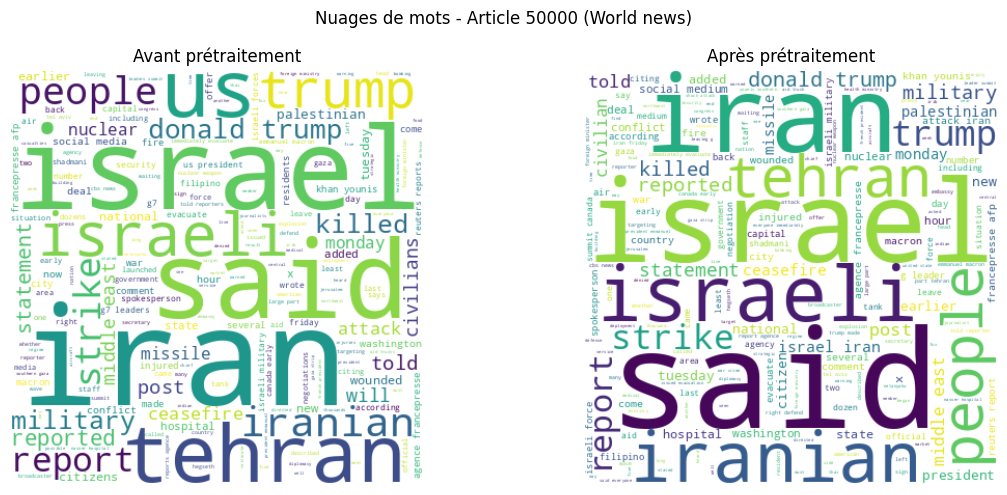

In [13]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Boucle sur chaque ligne du df_subset
for i, row in df_subset.iterrows():
    original_text = str(row['text'])
    cleaned_text = str(row['clean_text'])
    original_len = len(original_text)
    cleaned_len = len(cleaned_text)
    #print(f"\n=== Article index {i} - Section: {row['section']} - Original Text ===")
    #print(original_text)
    #print(f"\n=== Article index {i} - Section: {row['section']} - Cleaned Text ===")
    #print(cleaned_text)

    # Comparaison de la longueur des articles avant/après traitement
    original_text = str(row['text'])
    cleaned_text = str(row['clean_text'])
    original_len = len(original_text.split())
    cleaned_len = len(cleaned_text.split())

    # Affichage des longueurs avant/après pour cet article
    labels = ['Avant', 'Après']
    lengths = [original_len, cleaned_len]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, lengths, color=['skyblue', 'orange'])
    plt.title(f"Article {i} - Section: {row['section']}")
    plt.ylabel("Nombre de mots")
    plt.tight_layout()
    plt.show()

    # Compter les mots
    original_words = original_text.split()
    cleaned_words = cleaned_text.split()
    
    original_freq = Counter(original_words).most_common(10)
    cleaned_freq = Counter(cleaned_words).most_common(10)
    
    print(f"\n=== Article index {i} - Section: {row['section']} ===")
    print("Top 10 mots AVANT prétraitement:")
    print(original_freq)

    count_us = original_words.count('us')
    print(f"Nombre d'occurrences du mot 'us' dans le texte original : {count_us}")
    
    print("Top 10 mots APRÈS prétraitement:")
    print(cleaned_freq)

    # Générer les wordclouds
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    wordcloud_orig = WordCloud(width=400, height=400, background_color='white').generate(original_text)
    axs[0].imshow(wordcloud_orig, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title("Avant prétraitement")

    wordcloud_clean = WordCloud(width=400, height=400, background_color='white').generate(cleaned_text)
    axs[1].imshow(wordcloud_clean, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title("Après prétraitement")
    
    plt.suptitle(f"Nuages de mots - Article {i} ({row['section']})")
    plt.tight_layout()
    plt.show()



=== Section : Business ===
Top 10 mots AVANT prétraitement :
[('the', 139), ('to', 62), ('of', 52), ('in', 45), ('and', 38), ('a', 38), ('that', 36), ('for', 25), ('is', 23), ('oil', 21)]
Top 10 mots APRÈS prétraitement :
[('oil', 21), ('iran', 16), ('said', 13), ('market', 12), ('price', 12), ('point', 12), ('uk', 11), ('israel', 10), ('east', 9), ('could', 8)]


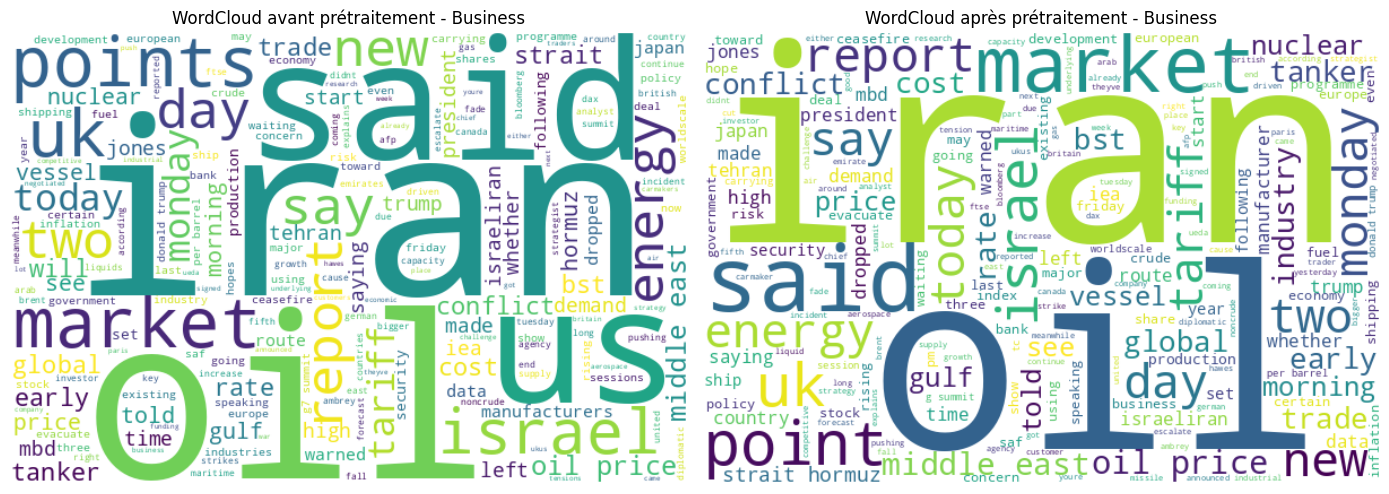


=== Section : Politics ===
Top 10 mots AVANT prétraitement :
[('the', 46), ('to', 26), ('and', 20), ('a', 18), ('i', 17), ('it', 17), ('in', 14), ('on', 13), ('at', 12), ('that', 12)]
Top 10 mots APRÈS prétraitement :
[('tariff', 5), ('report', 5), ('still', 5), ('message', 5), ('yesterday', 4), ('casey', 4), ('felt', 4), ('time', 4), ('pm', 4), ('starmer', 3)]


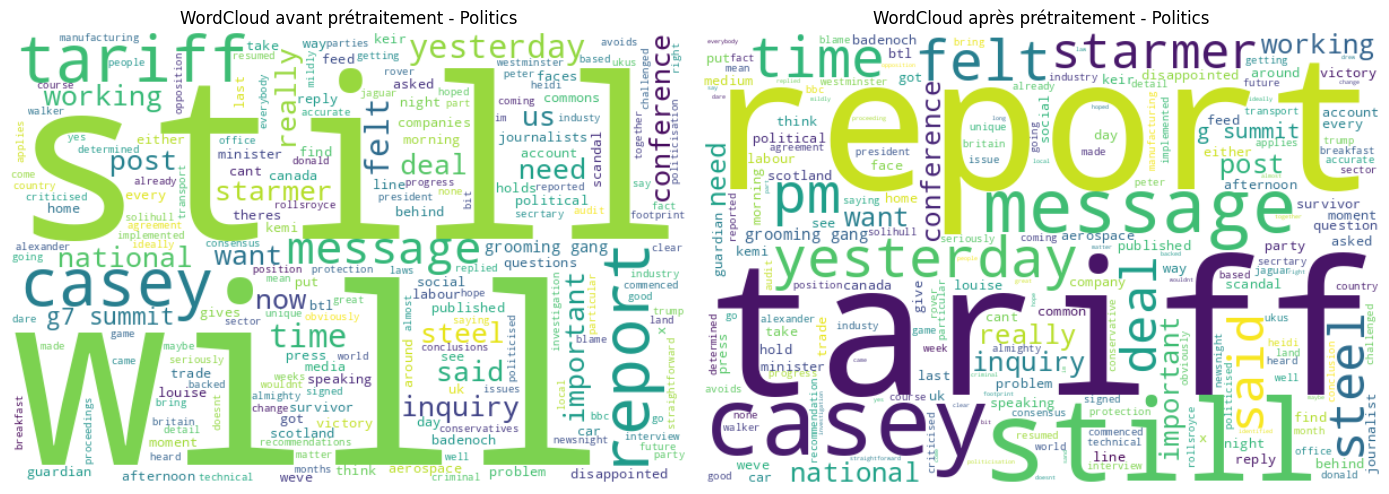


=== Section : Culture ===
Top 10 mots AVANT prétraitement :
[('the', 46), ('and', 24), ('a', 22), ('to', 20), ('we', 17), ('i', 14), ('of', 14), ('on', 13), ('in', 12), ('was', 12)]
Top 10 mots APRÈS prétraitement :
[('like', 7), ('song', 6), ('entertainment', 5), ('recorded', 4), ('jon', 3), ('leeds', 3), ('came', 3), ('andy', 3), ('four', 3), ('band', 3)]


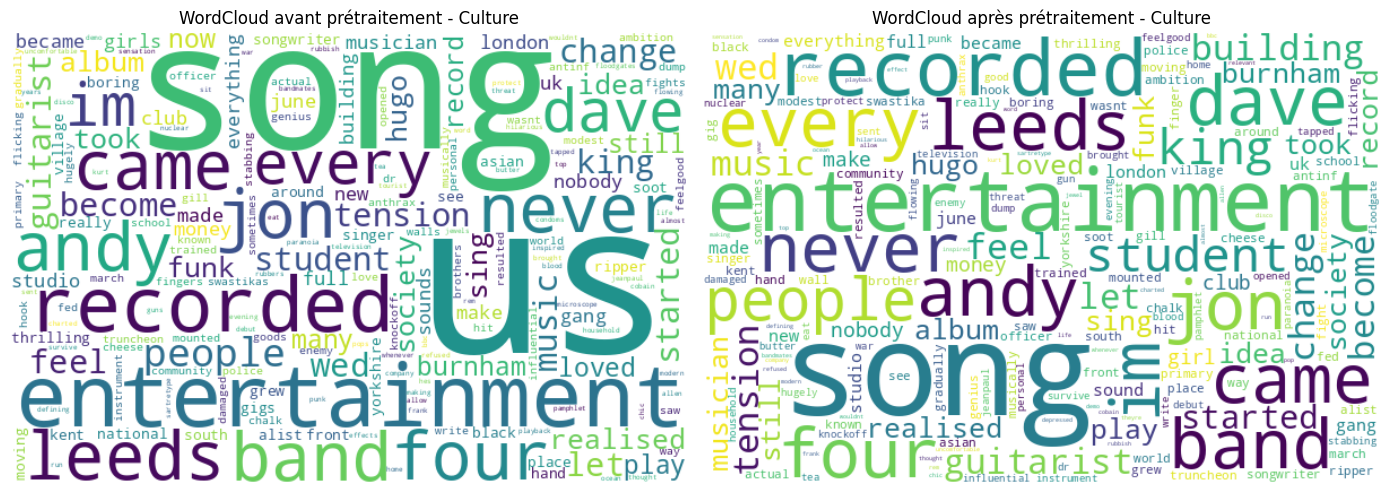


=== Section : Sport ===
Top 10 mots AVANT prétraitement :
[('the', 43), ('in', 21), ('a', 21), ('and', 16), ('to', 14), ('of', 12), ('pacers', 9), ('game', 9), ('indiana', 8), ('points', 8)]
Top 10 mots APRÈS prétraitement :
[('indiana', 10), ('game', 10), ('point', 10), ('pacer', 9), ('oklahoma', 7), ('city', 7), ('thunder', 7), ('first', 7), ('williams', 6), ('time', 6)]


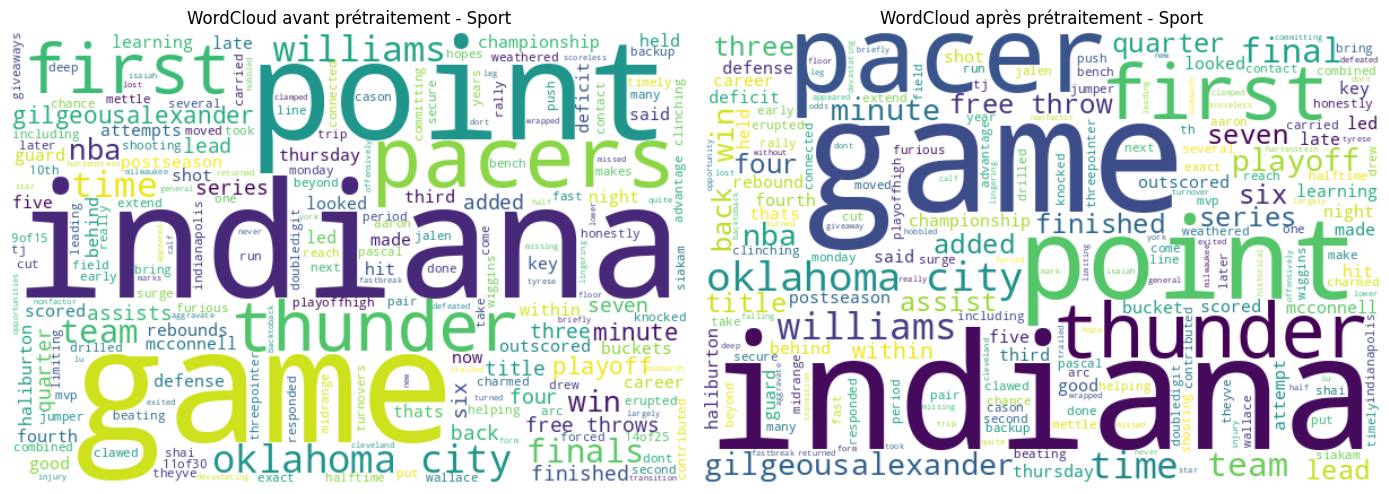


=== Section : Technology ===
Top 10 mots AVANT prétraitement :
[('to', 18), ('the', 14), ('and', 13), ('of', 12), ('information', 10), ('their', 9), ('we', 8), ('smart', 7), ('that', 7), ('data', 6)]
Top 10 mots APRÈS prétraitement :
[('information', 10), ('smart', 7), ('people', 6), ('data', 6), ('personal', 5), ('product', 5), ('privacy', 4), ('collect', 4), ('manufacturer', 4), ('ico', 3)]


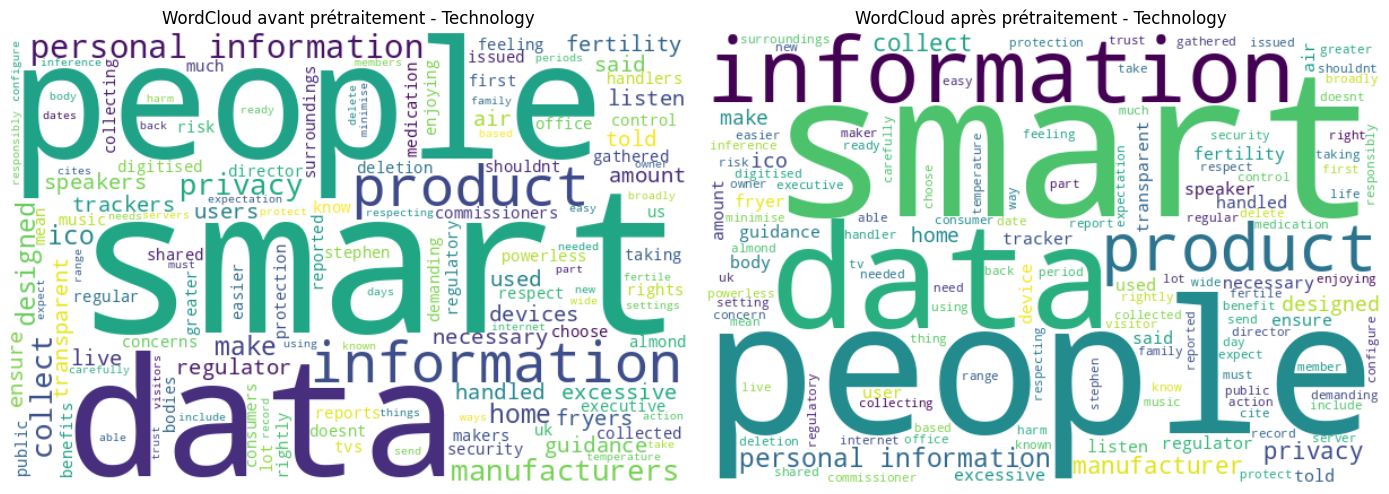


=== Section : World news ===
Top 10 mots AVANT prétraitement :
[('the', 287), ('in', 145), ('to', 142), ('of', 141), ('a', 131), ('and', 113), ('on', 87), ('that', 66), ('israel', 63), ('iran', 61)]
Top 10 mots APRÈS prétraitement :
[('iran', 71), ('israel', 66), ('said', 59), ('trump', 43), ('israeli', 40), ('report', 30), ('tehran', 27), ('iranian', 25), ('military', 24), ('people', 21)]


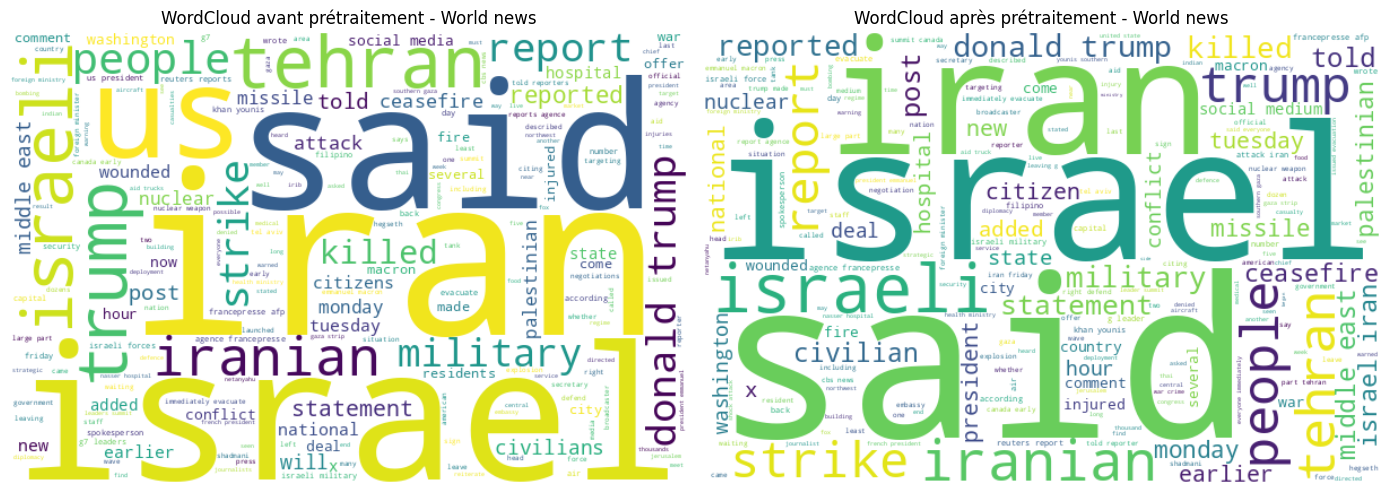

In [14]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def analyze_section_aggregate(df_subset, section_name):
    # Filtrer les articles de la section
    df_section = df_subset[df_subset['section'] == section_name]

    # Concaténer tous les textes en un seul gros texte
    original_text = " ".join(df_section['text'].astype(str).tolist())
    cleaned_text = " ".join(df_section['clean_text'].astype(str).tolist())

    # Top mots avant et après
    original_words = original_text.split()
    cleaned_words = cleaned_text.split()

    original_freq = Counter(original_words).most_common(10)
    cleaned_freq = Counter(cleaned_words).most_common(10)

    print(f"\n=== Section : {section_name} ===")
    print("Top 10 mots AVANT prétraitement :")
    print(original_freq)
    print("Top 10 mots APRÈS prétraitement :")
    print(cleaned_freq)

    # Wordclouds
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    wc_orig = WordCloud(width=600, height=400, background_color='white').generate(original_text)
    axs[0].imshow(wc_orig, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title(f"WordCloud avant prétraitement - {section_name}")

    wc_clean = WordCloud(width=600, height=400, background_color='white').generate(cleaned_text)
    axs[1].imshow(wc_clean, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title(f"WordCloud après prétraitement - {section_name}")

    plt.tight_layout()
    plt.show()

# Exemple pour toutes les sections
for section in df_subset['section'].unique():
    analyze_section_aggregate(df_subset, section)

# DÉMO 1 : TF-IDF avec scikit-learn 📊
### Objectif : Montrer la différence entre BoW et TF-IDF en pratique

In [15]:
# Installation des bibliothèques nécessaires
!pip install gensim transformers torch scikit-learn matplotlib seaborn numpy pandas

# Import des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ Toutes les bibliothèques sont installées et importées !")


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
✅ Toutes les bibliothèques sont installées et importées !


In [16]:
df_subset.columns

Index(['section', 'text', 'clean_text', 'original_len', 'cleaned_len',
       'reduction_ratio'],
      dtype='object')

In [17]:
df_subset[['clean_text', 'section']]

clean_text  \
0      two tanker collided water united arab emirate caught fire early hour morning united arab emirate coast guard say evacuated people oil tanker adalynn following collision two ship gulf oman near str...   
10000  keir starmer donald trump signed ukus trade deal g summit canada president saying britain would protection future tariff like peter walker report deal uk aerospace sector avoids tariff car industr...   
20000  jon king singer songwriter grew really boring village kent moving leeds student thrilling alist place see gig hand building black soot yorkshire ripper around could feel tension national front sou...   
30000  oklahoma city thunder moved within one win first nba championship year monday night beating indiana pacer game nba final take series lead jalen williams erupted career playoffhigh point mvp shai g...   
40000  maker air fryer smart speaker fertility tracker smart tv told respect people right privacy uk information commissioner office ico people reported feeling powerless control data gathered used share...   
50000  china said citizen able leave iran agence francepresse afp report foreign ministry spokesman guo jiakun told reporter bejing present chinese citizen safely evacuated neighbouring country israel ir...   

          section  
0        Business  
10000    Politics  
20000     Culture  
30000       Sport  
40000  Technology  
50000  World news

In [18]:
# Transformation en liste
corpus = df_subset['clean_text'].tolist()

sections = df_subset['section'].tolist()

for i, doc in enumerate(corpus):
    print(f"  Article{i+1}: '{doc}'")

  Article1: 'two tanker collided water united arab emirate caught fire early hour morning united arab emirate coast guard say evacuated people oil tanker adalynn following collision two ship gulf oman near strait hormuz british maritime security firm ambrey said cause incident securityrelated daniel smith analyst ambrey said via bloomberg time writing confirm security incident continue investigate cause global oil supply set increase far faster demand coming year international energy agency predicted new report iea argues oil market undergoing structural change key driver supply demand growth past year start fade iea estimate global oil demand forecast increase million barrel per day mbd reaching plateau around mbd end decade time global oil production capacity forecast rise mbd mbd due increased output canada brazil guyana argentina unwinding production cut opec group iea say growth set dominated robust gain natural gas liquid ngls noncrude liquid strategic shift towards higher noncru

In [19]:
# Affichage 1️⃣ BAG OF WORDS (BoW)
print("🎒 BAG OF WORDS (BoW)")
print("=" * 30)

# Création de la matrice BoW
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(corpus)

# Vocabulaire extrait
vocab = bow_vectorizer.get_feature_names_out()
print(f"📚 Vocabulaire ({len(vocab)} mots):")
print(list(vocab))

# Création d’un DataFrame avec les titres comme index
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vocab,
    index=sections  # utilise les titres des documents comme index
)

# Affichage de la matrice
print("\n📊 Matrice BoW :")
print(bow_df)

🎒 BAG OF WORDS (BoW)
📚 Vocabulaire (2152 mots):
['aaron', 'abbas', 'abc', 'able', 'abortion', 'absence', 'absent', 'accommodation', 'accomplished', 'according', 'account', 'accurate', 'across', 'act', 'action', 'actual', 'adalynn', 'add', 'added', 'adding', 'additional', 'administers', 'adraee', 'adult', 'advanced', 'advantage', 'advised', 'advisory', 'aeroplane', 'aerospace', 'affair', 'affect', 'affected', 'affecting', 'affirm', 'affirmed', 'afp', 'africa', 'afternoon', 'agence', 'agency', 'agenda', 'aggravate', 'aggression', 'aggressor', 'ago', 'agreed', 'agreement', 'ahead', 'aid', 'aileen', 'aimed', 'aiming', 'air', 'aircraft', 'airline', 'airspace', 'alanbiya', 'album', 'alexander', 'ali', 'alike', 'alist', 'allen', 'allow', 'alltime', 'almighty', 'almond', 'almost', 'along', 'alongside', 'already', 'also', 'always', 'amazed', 'ambassador', 'ambition', 'ambrey', 'amendment', 'america', 'american', 'amid', 'amman', 'among', 'amount', 'amp', 'ana', 'analyst', 'andrew', 'andrewsparr

In [20]:
# 2️⃣ TF-IDF
print("\n📈 TF-IDF")
print("=" * 30)

# Création du modèle TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Vocabulaire extrait
vocab = tfidf_vectorizer.get_feature_names_out()

# Création du DataFrame TF-IDF
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vocab,
    index=sections
)

# Affichage
print("📊 Matrice TF-IDF (arrondie à 3 décimales) :")
print(tfidf_df.round(3))


📈 TF-IDF
📊 Matrice TF-IDF (arrondie à 3 décimales) :
            aaron  abbas    abc   able  abortion  absence  absent  \
Business    0.000  0.000  0.000  0.000     0.000    0.018   0.000   
Politics    0.000  0.000  0.000  0.000     0.042    0.000   0.000   
Culture     0.000  0.000  0.000  0.000     0.000    0.000   0.000   
Sport       0.033  0.000  0.000  0.000     0.000    0.000   0.000   
Technology  0.000  0.000  0.000  0.040     0.000    0.000   0.000   
World news  0.000  0.007  0.007  0.006     0.000    0.000   0.007   

            accommodation  accomplished  according  ...    yes  yesterday  \
Business            0.000         0.000      0.030  ...  0.000      0.030   
Politics            0.000         0.000      0.000  ...  0.042      0.137   
Culture             0.000         0.000      0.000  ...  0.000      0.000   
Sport               0.000         0.000      0.000  ...  0.000      0.000   
Technology          0.000         0.000      0.000  ...  0.000      0.000   


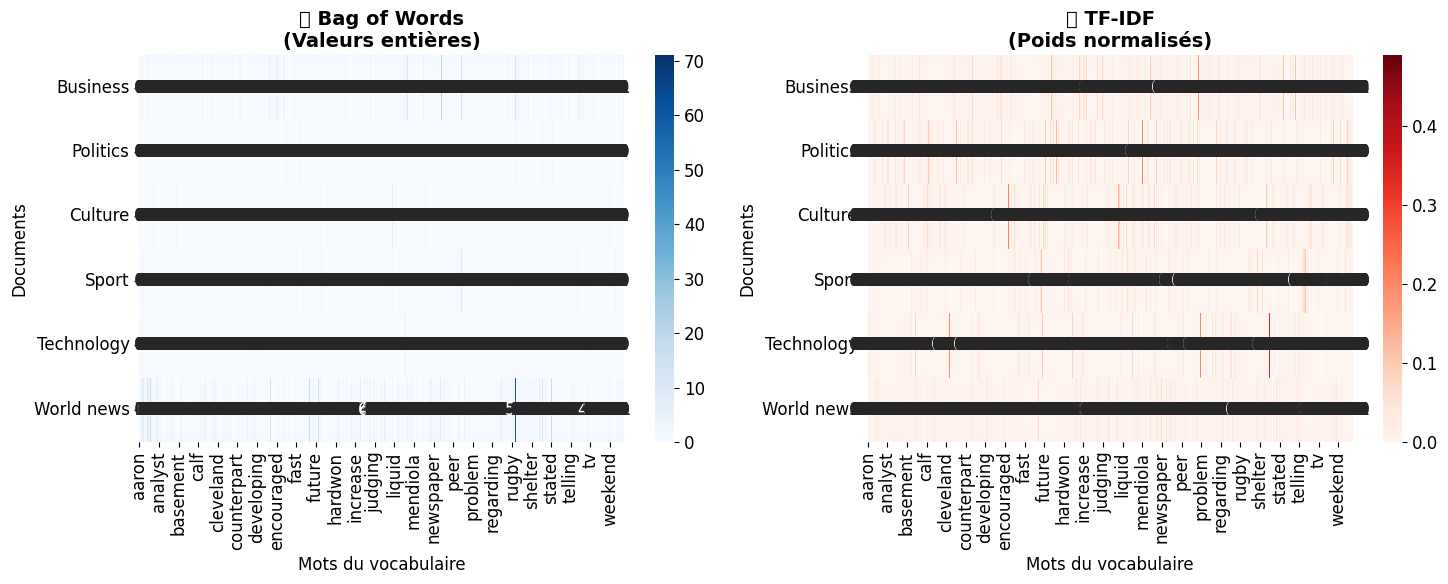


🔍 Observations :
  • BoW : compte simple des occurrences
  • TF-IDF : 'le' a un poids faible (très fréquent)
  • TF-IDF : mots spécifiques ont plus de poids


In [21]:
# 3️⃣ COMPARAISON VISUELLE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap BoW
sns.heatmap(bow_df, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('🎒 Bag of Words\n(Valeurs entières)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mots du vocabulaire')
ax1.set_ylabel('Documents')

# Heatmap TF-IDF
sns.heatmap(tfidf_df, annot=True, fmt='.2f', cmap='Reds', ax=ax2)
ax2.set_title('📈 TF-IDF\n(Poids normalisés)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Mots du vocabulaire')
ax2.set_ylabel('Documents')

plt.tight_layout()
plt.show()

print("\n🔍 Observations :")
print("  • BoW : compte simple des occurrences")
print("  • TF-IDF : 'le' a un poids faible (très fréquent)")
print("  • TF-IDF : mots spécifiques ont plus de poids")

In [25]:
import numpy as np

mot_exemple = "iran"
total_docs = len(corpus)

# Vérification que le mot est bien dans le vocabulaire
if mot_exemple not in bow_df.columns:
    print(f"❌ Le mot '{mot_exemple}' n'est pas présent dans le vocabulaire.")
else:
    # DF (Document Frequency)
    df = (bow_df[mot_exemple] > 0).sum()

    # IDF
    idf = np.log(total_docs / df)

    print(f"📚 Analyse du mot '{mot_exemple}' dans {total_docs} documents")
    print(f"➡️ DF = {df} / {total_docs} documents contiennent le mot")
    print(f"➡️ IDF = log({total_docs}/{df}) = {idf:.3f}")
    print(f"💡 Plus le mot est rare ET fréquent dans le doc, plus le score est élevé !")
    print("=" * 50)

    # Parcours de chaque document
    for i in range(total_docs):
        doc_name = bow_df.index[i]

        tf = bow_df.loc[doc_name, mot_exemple]
        doc_length = bow_df.loc[doc_name].sum()
        tf_normalized = tf / doc_length if doc_length > 0 else 0
        tfidf_manual = tf_normalized * idf
        tfidf_sklearn = tfidf_df.loc[doc_name, mot_exemple]

        print(f"📄 {doc_name}")
        print(f"Pour le mot '{mot_exemple}' dans Doc{total_docs} :")
        print(f"  📊 TF = {tf}/{doc_length} = {tf_normalized:.3f}")
        print(f"  ⚡ TF-IDF = {tf_normalized:.3f} × {idf:.3f} = {tfidf_manual:.3f}")
        print(f"  ✅ Sklearn TF-IDF = {tfidf_sklearn:.3f}")
        print("-" * 50)


📚 Analyse du mot 'iran' dans 6 documents
➡️ DF = 2 / 6 documents contiennent le mot
➡️ IDF = log(6/2) = 1.099
💡 Plus le mot est rare ET fréquent dans le doc, plus le score est élevé !
📄 Business
Pour le mot 'iran' dans Doc6 :
  📊 TF = 16/1255 = 0.013
  ⚡ TF-IDF = 0.013 × 1.099 = 0.014
  ✅ Sklearn TF-IDF = 0.240
--------------------------------------------------
📄 Politics
Pour le mot 'iran' dans Doc6 :
  📊 TF = 0/466 = 0.000
  ⚡ TF-IDF = 0.000 × 1.099 = 0.000
  ✅ Sklearn TF-IDF = 0.000
--------------------------------------------------
📄 Culture
Pour le mot 'iran' dans Doc6 :
  📊 TF = 0/421 = 0.000
  ⚡ TF-IDF = 0.000 × 1.099 = 0.000
  ✅ Sklearn TF-IDF = 0.000
--------------------------------------------------
📄 Sport
Pour le mot 'iran' dans Doc6 :
  📊 TF = 0/377 = 0.000
  ⚡ TF-IDF = 0.000 × 1.099 = 0.000
  ✅ Sklearn TF-IDF = 0.000
--------------------------------------------------
📄 Technology
Pour le mot 'iran' dans Doc6 :
  📊 TF = 0/205 = 0.000
  ⚡ TF-IDF = 0.000 × 1.099 = 0.000
  ✅ 

# DÉMO 2 : Word2Vec et analogies avec Gensim

**Objectif :** Démontrer les analogies magiques de Word2Vec

In [26]:
sentences = df_subset['clean_text'].apply(str.split).tolist()

# Affichage pour vérification
for i, s in enumerate(sentences):
    print(f"Article {i+1} : {s[:10]}... ({len(s)} mots)")

Article 1 : ['two', 'tanker', 'collided', 'water', 'united', 'arab', 'emirate', 'caught', 'fire', 'early']... (1259 mots)
Article 2 : ['keir', 'starmer', 'donald', 'trump', 'signed', 'ukus', 'trade', 'deal', 'g', 'summit']... (471 mots)
Article 3 : ['jon', 'king', 'singer', 'songwriter', 'grew', 'really', 'boring', 'village', 'kent', 'moving']... (421 mots)
Article 4 : ['oklahoma', 'city', 'thunder', 'moved', 'within', 'one', 'win', 'first', 'nba', 'championship']... (377 mots)
Article 5 : ['maker', 'air', 'fryer', 'smart', 'speaker', 'fertility', 'tracker', 'smart', 'tv', 'told']... (205 mots)
Article 6 : ['china', 'said', 'citizen', 'able', 'leave', 'iran', 'agence', 'francepresse', 'afp', 'report']... (3210 mots)


In [27]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [28]:
# Accès simplifié au vocabulaire appris
vocabulaire = list(model.wv.index_to_key)

# Paires aléatoires depuis ton vocabulaire
import random

test_pairs = [
    ("arab", "emirate"),
    ("signed", "trade"),
    ("village", "songwriter"),
    ("thunder", "nba"),
    ("fertility", "maker"),
    ("citizen", "report")
]

print("🔍 SIMILARITÉ ENTRE MOTS (à partir de tes articles)")
print("=" * 45)

for word1, word2 in test_pairs:
    try:
        sim = model.wv.similarity(word1, word2)
        print(f"📊 '{word1}' ↔ '{word2}' : {sim:.3f}")
    except KeyError as e:
        print(f"❌ Mot non trouvé : {e}")


🔍 SIMILARITÉ ENTRE MOTS (à partir de tes articles)
📊 'arab' ↔ 'emirate' : -0.053
📊 'signed' ↔ 'trade' : 0.162
📊 'village' ↔ 'songwriter' : 0.010
📊 'thunder' ↔ 'nba' : -0.034
📊 'fertility' ↔ 'maker' : 0.154
📊 'citizen' ↔ 'report' : 0.045


In [29]:
mot = "rugby"
if mot in model.wv:
    print(f"\n🔍 Mots les plus proches de '{mot}' :")
    print(model.wv.most_similar(mot, topn=5))


🔍 Mots les plus proches de 'rugby' :
[('still', 0.35786935687065125), ('nursing', 0.3222877085208893), ('adalynn', 0.3065169155597687), ('chief', 0.2827860713005066), ('canada', 0.2733505070209503)]


In [30]:
# Vocabulaire appris
print("📚 Vocabulaire appris :", list(model.wv.index_to_key)[:20])


📚 Vocabulaire appris : ['iran', 'said', 'israel', 'trump', 'report', 'israeli', 'people', 'tehran', 'iranian', 'told', 'military', 'president', 'nuclear', 'east', 'also', 'point', 'oil', 'donald', 'strike', 'g']


In [31]:
print("🎯 MOTS LES PLUS PROCHES")
print("=" * 30)

test_words = ["rugby", "village", "citizen", "iran"]

for word in test_words:
    try:
        similar_words = model.wv.most_similar(word, topn=5)
        print(f"\n🔍 Mots les plus proches de '{word}' :")
        for similar_word, score in similar_words:
            print(f"  {score:.3f} → {similar_word}")
    except KeyError:
        print(f"❌ Mot '{word}' non trouvé dans le vocabulaire")


🎯 MOTS LES PLUS PROCHES

🔍 Mots les plus proches de 'rugby' :
  0.358 → still
  0.322 → nursing
  0.307 → adalynn
  0.283 → chief
  0.273 → canada

🔍 Mots les plus proches de 'village' :
  0.339 → intended
  0.318 → policy
  0.306 → rally
  0.294 → make
  0.292 → victorian

🔍 Mots les plus proches de 'citizen' :
  0.351 → historical
  0.324 → electricity
  0.316 → heard
  0.296 → hobbled
  0.294 → shellfire

🔍 Mots les plus proches de 'iran' :
  0.410 → palestinian
  0.379 → position
  0.362 → oil
  0.359 → told
  0.338 → since



📊 VISUALISATION DES VECTEURS


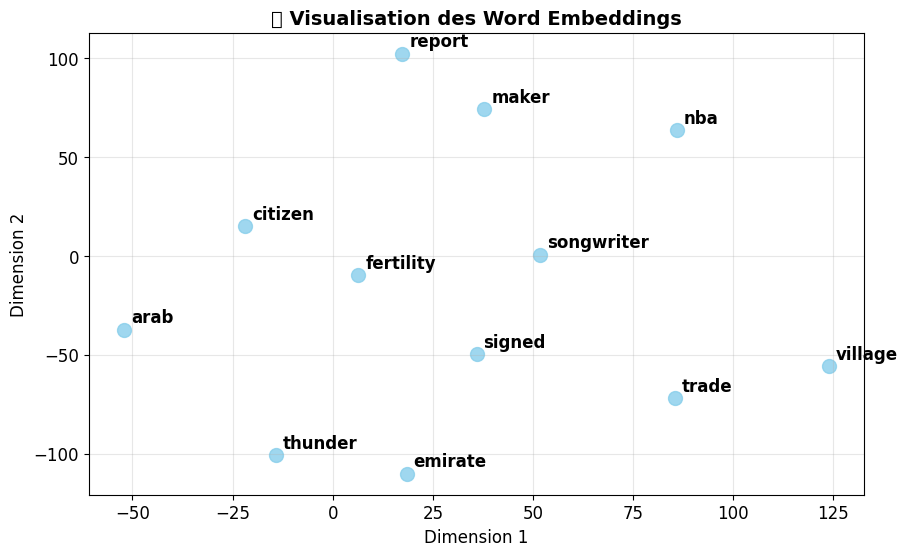

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 VISUALISATION DES VECTEURS")
print("=" * 35)

# Extraire les mots uniques depuis les paires
words_to_plot = list(set([w for pair in test_pairs for w in pair]))

vectors = []
valid_words = []

for word in words_to_plot:
    try:
        vector = model.wv[word]
        vectors.append(vector)
        valid_words.append(word)
    except KeyError:
        print(f"⚠️ Mot '{word}' ignoré (non trouvé dans le vocabulaire)")

if len(vectors) >= 2:
    vectors_array = np.array(vectors)

    if len(vectors) > 2:
        tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(vectors)-1))
        vectors_2d = tsne.fit_transform(vectors_array)
    else:
        vectors_2d = vectors_array[:, :2]

    plt.figure(figsize=(10, 6))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=100, c='skyblue', alpha=0.8)

    for i, word in enumerate(valid_words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=12, fontweight='bold')

    plt.title("🗺️ Visualisation des Word Embeddings", fontsize=14, fontweight='bold')
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("❌ Pas assez de mots valides pour la visualisation.")


In [33]:
from transformers import AutoTokenizer, AutoModel
import torch

print("🤖 CHARGEMENT DE BERT")
print("=" * 25)

model_name = "bert-base-multilingual-cased"
print(f"📥 Chargement du modèle : {model_name}")
print("   (Ceci peut prendre une minute...)")

try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    bert_model = AutoModel.from_pretrained(model_name)
    bert_model.eval()
    print("✅ BERT chargé avec succès !")
except Exception as e:
    print(f"❌ Erreur de chargement : {e}")


🤖 CHARGEMENT DE BERT
📥 Chargement du modèle : bert-base-multilingual-cased
   (Ceci peut prendre une minute...)
✅ BERT chargé avec succès !


In [39]:
# Fonction pour extraire l'embedding d'un mot dans une phrase
def get_word_embedding(sentence, target_word, tokenizer, model):
    """
    Extrait l'embedding BERT d'un mot dans une phrase donnée
    """
    # Tokenisation
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    tokens = tokenizer.tokenize(sentence)
    
    # Passage dans BERT
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[0]  # [sequence_length, hidden_size]
    
    # Trouver la position du mot cible
    target_token = target_word.lower()
    for i, token in enumerate(tokens):
        if target_token in token.lower():
            # +1 car BERT ajoute [CLS] au début
            return embeddings[i+1].numpy(), i+1
    
    return None, -1

print("🔧 Fonction d'extraction d'embeddings prête !")

🔧 Fonction d'extraction d'embeddings prête !


In [45]:
target_word = "rugby"  # Change this to any word you want to analyze
word_embeddings = []
missing_indices = []

print("\n🧠 EXTRACTION DES EMBEDDINGS POUR LE MOT :", target_word)
print("=" * 50)

for i, text in enumerate(df_subset["clean_text"]):
    print(f"🔍 Article {i+1}/{len(df_subset)}")
    emb, idx = get_word_embedding(text, target_word, tokenizer, bert_model)
    
    if emb is not None:
        word_embeddings.append(emb)
        print(f"✅ {target_word} : Embedding extrait ! Position token: {idx}")
        print(f"📏 Dimension: {len(emb)}")
        print(f"🔢 Premières valeurs: {emb[:5].round(3)}")
    else:
        print(f"⚠️ Mot '{target_word}' non trouvé dans l'article {i+1}")
        word_embeddings.append(None)
        missing_indices.append(i)



🧠 EXTRACTION DES EMBEDDINGS POUR LE MOT : rugby
🔍 Article 1/6
⚠️ Mot 'rugby' non trouvé dans l'article 1
🔍 Article 2/6
⚠️ Mot 'rugby' non trouvé dans l'article 2
🔍 Article 3/6
✅ rugby : Embedding extrait ! Position token: 315
📏 Dimension: 768
🔢 Premières valeurs: [-0.225 -0.279  0.245  0.135 -0.381]
🔍 Article 4/6
⚠️ Mot 'rugby' non trouvé dans l'article 4
🔍 Article 5/6
⚠️ Mot 'rugby' non trouvé dans l'article 5
🔍 Article 6/6
⚠️ Mot 'rugby' non trouvé dans l'article 6


In [47]:
target_words = ["rugby", "trade", "citizen"]

all_embeddings = {}

print("\n🧠 EXTRACTION DES EMBEDDINGS POUR PLUSIEURS MOTS")
print("=" * 50)

for word in target_words:
    print(f"\n🔠 Mot à analyser : '{word}'")
    embeddings = []
    missing_indices = []

    for i, text in enumerate(df_subset["clean_text"]):
        print(f"  🔎 Article {i+1}/{len(df_subset)}")

        # Extraction de l'embedding pour le mot dans l'article courant
        emb, idx = get_word_embedding(text, word, tokenizer, bert_model)

        if emb is not None:
            embeddings.append(emb)
            print(f"    ✅ '{word}' trouvé dans l'article {i+1} (token index : {idx})")
            print(f"    📏 Dimension de l'embedding : {len(emb)}")
            print(f"    🔢 Premières valeurs : {emb[:5].round(3)}")
        else:
            print(f"    ⚠️ Mot '{word}' non trouvé dans l'article {i+1}")
            embeddings.append(None)
            missing_indices.append(i)

    # Enregistrement des embeddings du mot dans le dictionnaire final
    all_embeddings[word] = embeddings

    print(f"\n📦 Résumé pour le mot '{word}' :")
    print(f"   → Embeddings extraits pour {len(embeddings) - len(missing_indices)} articles")
    print(f"   → Articles sans le mot : {missing_indices if missing_indices else 'Aucun'}")



🧠 EXTRACTION DES EMBEDDINGS POUR PLUSIEURS MOTS

🔠 Mot à analyser : 'rugby'
  🔎 Article 1/6
    ⚠️ Mot 'rugby' non trouvé dans l'article 1
  🔎 Article 2/6
    ⚠️ Mot 'rugby' non trouvé dans l'article 2
  🔎 Article 3/6
    ✅ 'rugby' trouvé dans l'article 3 (token index : 315)
    📏 Dimension de l'embedding : 768
    🔢 Premières valeurs : [-0.225 -0.279  0.245  0.135 -0.381]
  🔎 Article 4/6
    ⚠️ Mot 'rugby' non trouvé dans l'article 4
  🔎 Article 5/6
    ⚠️ Mot 'rugby' non trouvé dans l'article 5
  🔎 Article 6/6
    ⚠️ Mot 'rugby' non trouvé dans l'article 6

📦 Résumé pour le mot 'rugby' :
   → Embeddings extraits pour 1 articles
   → Articles sans le mot : [0, 1, 3, 4, 5]

🔠 Mot à analyser : 'trade'
  🔎 Article 1/6
    ✅ 'trade' trouvé dans l'article 1 (token index : 365)
    📏 Dimension de l'embedding : 768
    🔢 Premières valeurs : [-0.646 -0.131  0.381 -0.129  0.53 ]
  🔎 Article 2/6
    ✅ 'trade' trouvé dans l'article 2 (token index : 12)
    📏 Dimension de l'embedding : 768
    🔢

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Exemple : comparer 'rugby' dans article 1 et 'trade' dans article 2
emb1, _ = get_word_embedding(df_subset["clean_text"].iloc[2], "rugby", tokenizer, bert_model)
emb2, _ = get_word_embedding(df_subset["clean_text"].iloc[1], "trade", tokenizer, bert_model)

if emb1 is not None and emb2 is not None:
    similarity = cosine_similarity([emb1], [emb2])[0][0]
    print(f"📏 Similarité entre 'rugby' (article 1) et 'trade' (article 2) : {similarity:.3f}")
else:
    print("❌ L’un des mots n’a pas été trouvé.")


📏 Similarité entre 'rugby' (article 1) et 'trade' (article 2) : 0.603


In [58]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from itertools import product

print("\n📊 SIMILARITÉ ENTRE TOUS LES MOTS TROUVÉS")
print("=" * 45)

for word1, word2 in product(target_words, repeat=2):
    embeddings1 = all_embeddings.get(word1, [])
    embeddings2 = all_embeddings.get(word2, [])

    #if word1 == word2 and i == j:
        #continue  # Skip l'auto-comparaison exacte

    for i, emb1 in enumerate(embeddings1):
        if emb1 is None:
            continue
        for j, emb2 in enumerate(embeddings2):
            if emb2 is None:
                continue

            similarity = cosine_similarity([emb1], [emb2])[0][0]
            print(f"🔗 Similarité entre '{word1}' (article {i+1}) et '{word2}' (article {j+1}) : {similarity:.3f}")


📊 SIMILARITÉ ENTRE TOUS LES MOTS TROUVÉS
🔗 Similarité entre 'rugby' (article 3) et 'rugby' (article 3) : 1.000
🔗 Similarité entre 'rugby' (article 3) et 'trade' (article 1) : 0.494
🔗 Similarité entre 'rugby' (article 3) et 'trade' (article 2) : 0.603
🔗 Similarité entre 'rugby' (article 3) et 'citizen' (article 6) : 0.379
🔗 Similarité entre 'trade' (article 1) et 'rugby' (article 3) : 0.494
🔗 Similarité entre 'trade' (article 2) et 'rugby' (article 3) : 0.603
🔗 Similarité entre 'trade' (article 1) et 'trade' (article 1) : 1.000
🔗 Similarité entre 'trade' (article 1) et 'trade' (article 2) : 0.532
🔗 Similarité entre 'trade' (article 2) et 'trade' (article 1) : 0.532
🔗 Similarité entre 'trade' (article 2) et 'trade' (article 2) : 1.000
🔗 Similarité entre 'trade' (article 1) et 'citizen' (article 6) : 0.401
🔗 Similarité entre 'trade' (article 2) et 'citizen' (article 6) : 0.433
🔗 Similarité entre 'citizen' (article 6) et 'rugby' (article 3) : 0.379
🔗 Similarité entre 'citizen' (article 6)


🖼️ VISUALISATION DES EMBEDDINGS (t-SNE)


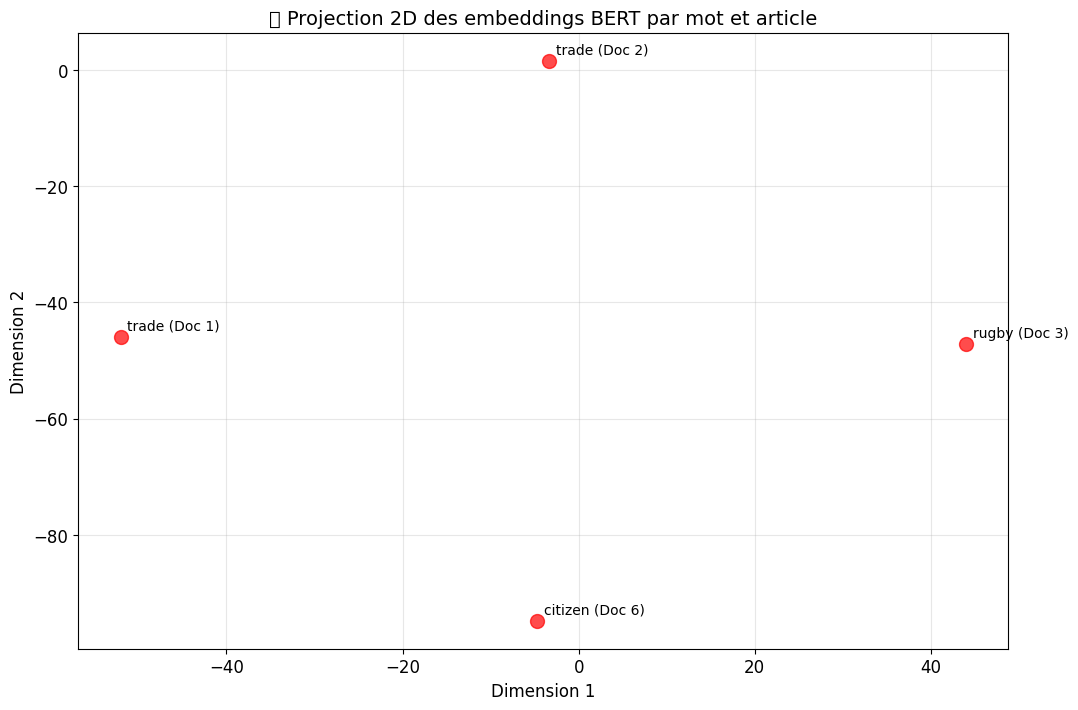

In [59]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

print("\n🖼️ VISUALISATION DES EMBEDDINGS (t-SNE)")
print("=" * 45)

vectors = []
labels = []

# Préparation des vecteurs et étiquettes
for word, embeddings in all_embeddings.items():
    for i, emb in enumerate(embeddings):
        if emb is not None:
            vectors.append(emb)
            labels.append(f"{word} (Doc {i+1})")

# Vérification qu'il y a assez de points
if len(vectors) >= 2:
    X = np.array(vectors)

    # Application de t-SNE pour réduire en 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(X) - 1))
    X_2d = tsne.fit_transform(X)

    # Affichage
    plt.figure(figsize=(12, 8))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c='red', s=100, alpha=0.7)

    for i, label in enumerate(labels):
        plt.annotate(label, (X_2d[i, 0], X_2d[i, 1]), 
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=10)

    plt.title("🧠 Projection 2D des embeddings BERT par mot et article", fontsize=14)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("❌ Pas assez de vecteurs pour appliquer t-SNE.")
